# Predictive Modeling Project

Mathew Gueon

### Project Desciption

This project focused on predicting wine quality using alcohol content as the predictive variable, employing various machine learning models. The project emphasized data preparation, model evaluation, and performance comparison. Data preprocessing steps included splitting the dataset, checking for missing values, removing outliers, and exploring feature relationships through correlation matrices. Several models were used, including Simple Linear Regression (SLR), Multiple Linear Regression, Regression Trees with varying depths, Support Vector Regression (SVR) with different C values, and Multi-Layer Perceptron (MLP) models with varying hidden layers and nodes. Model performance was evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

In [936]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

## 1. Data Preparation

In [937]:
qWine = pd.read_csv('c:/CSV_Files/winequality-red.csv')
qWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [938]:
qWine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Check for Missing Values

In [939]:
qWine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Drop outliers

In [940]:
#Calculate IQR for each feature
Q1 = qWine.quantile(0.25)
Q3 = qWine.quantile(0.75)
IQR = Q3 - Q1
#Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Remove outliers
Wine = qWine[~((qWine < lower_bound) | (qWine > upper_bound)).any(axis=1)]

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1179.000000       1179.000000  1179.000000     1179.000000   
mean        8.162002          0.523066     0.246760        2.185411   
std         1.458270          0.164231     0.179441        0.440972   
min         5.100000          0.120000     0.000000        1.200000   
25%         7.100000          0.390000     0.080000        1.900000   
50%         7.800000          0.520000     0.240000        2.100000   
75%         9.000000          0.630000     0.390000        2.500000   
max        12.300000          1.005000     0.730000        3.600000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1179.000000          1179.000000           1179.000000  1179.000000   
mean      0.078586            15.020356             42.268024     0.996584   
std       0.014317             8.792916             26.106438     0.001593   
min       0.041000             1.000000         

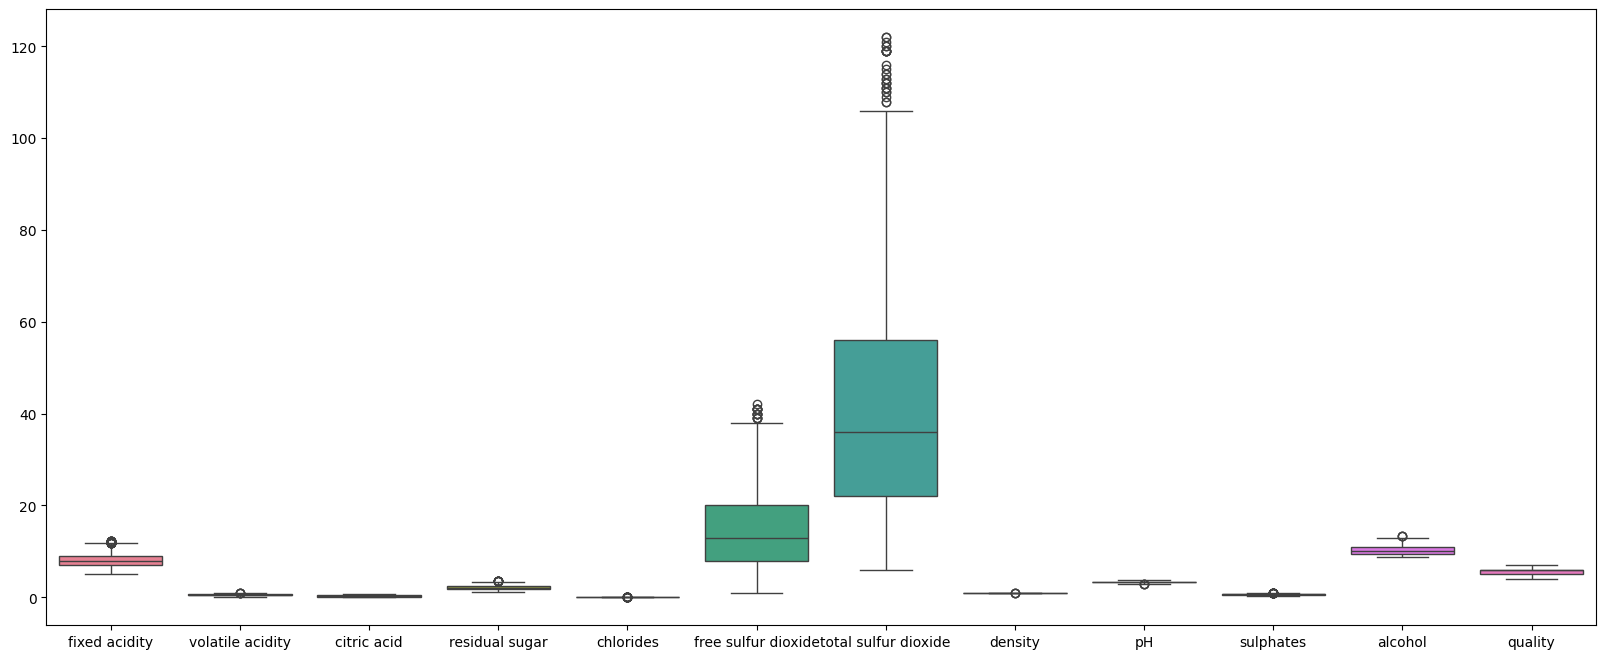

In [941]:
print(Wine.describe())

plt.figure(figsize=(20, 8))
sns.boxplot(data=Wine)
plt.show()

A correlation Matrix to visualize wine variables

In [942]:
Wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.271010,0.659397,0.229653,0.197774,-0.150845,-0.087083,0.610125,-0.684378,0.165367,-0.037999,0.113422
volatile acidity,-0.271010,1.000000,-0.627194,0.035215,0.117805,-0.016718,0.097487,0.044174,0.220702,-0.317346,-0.220600,-0.346962
citric acid,0.659397,-0.627194,1.000000,0.149494,0.073031,-0.068852,0.004660,0.305458,-0.470286,0.256747,0.137762,0.212133
residual sugar,0.229653,0.035215,0.149494,1.000000,0.232752,0.088405,0.199534,0.394732,-0.054684,0.040172,0.098175,0.007934
chlorides,0.197774,0.117805,0.073031,0.232752,1.000000,0.012326,0.176938,0.411902,-0.175758,-0.076853,-0.300750,-0.190869
free sulfur dioxide,-0.150845,-0.016718,-0.068852,0.088405,0.012326,1.000000,0.619675,-0.021505,0.149126,0.107455,-0.022415,-0.003609
total sulfur dioxide,-0.087083,0.097487,0.004660,0.199534,0.176938,0.619675,1.000000,0.149847,0.010031,-0.049655,-0.245125,-0.203374
density,0.610125,0.044174,0.305458,0.394732,0.411902,-0.021505,0.149847,1.000000,-0.227471,0.081691,-0.538901,-0.215375
pH,-0.684378,0.220702,-0.470286,-0.054684,-0.175758,0.149126,0.010031,-0.227471,1.000000,0.013972,0.126747,-0.060288
sulphates,0.165367,-0.317346,0.256747,0.040172,-0.076853,0.107455,-0.049655,0.081691,0.013972,1.000000,0.260783,0.413533


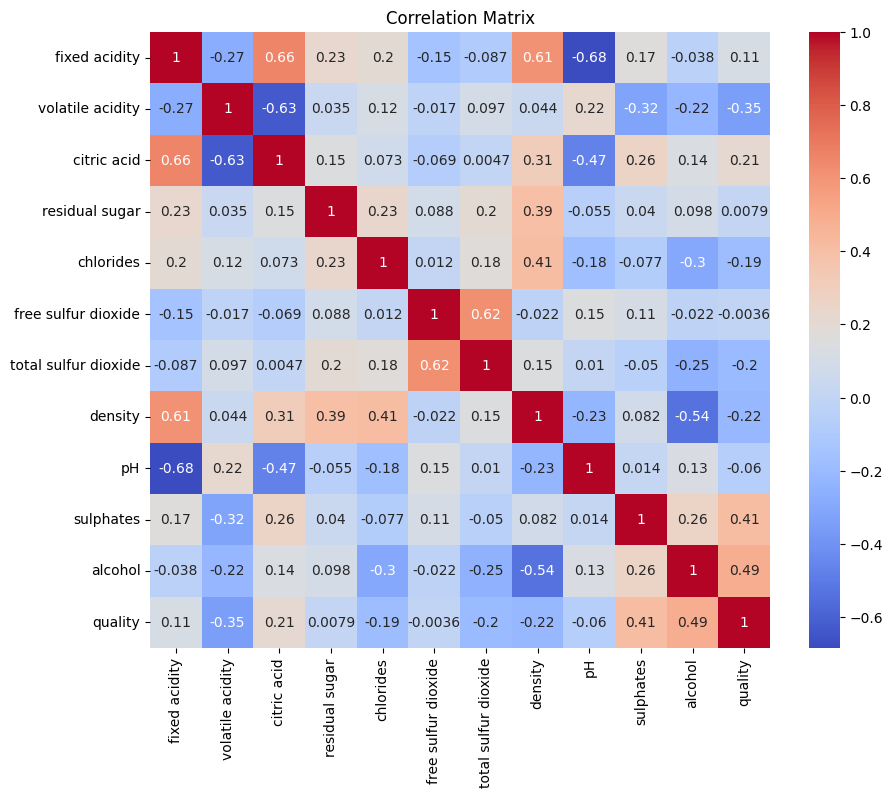

In [943]:
correlation_matrix = Wine.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Histogram of quality in the data set')

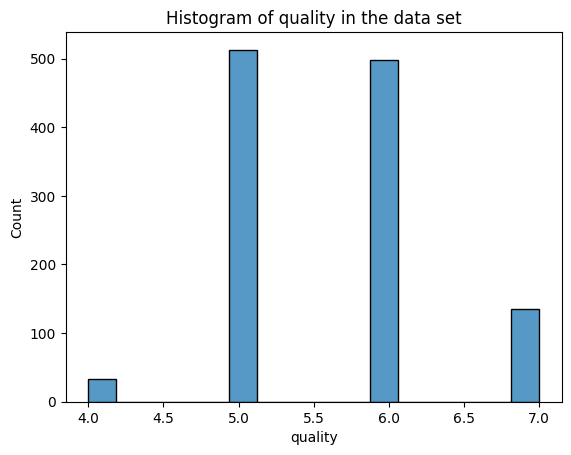

In [944]:
snsplot = sns.histplot(x='quality', data = Wine)
snsplot.set_title("Histogram of quality in the data set")

We can see that the data has a slight bell shape, with most wines in the mid 5-6 range of quality.

Make Training and Testing Splits

In [945]:
from sklearn.model_selection import train_test_split

In [946]:
X = Wine.drop(columns=['quality'])
y = Wine['quality']

In [947]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 2. Simple Linear Regression

#### Import libraries for linear regression

In [948]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

#### Use Alcohol to predict quality of wine

In [949]:
X = Wine[['alcohol']]
y = Wine['quality']

In [950]:
model1 = LinearRegression()
model1.fit(X_train[['alcohol']], y_train)

LinearRegression()

In [951]:
X_train_sm = sm.add_constant(X_train[['alcohol']])

est = sm.OLS(y_train, X_train_sm)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     287.0
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           2.13e-56
Time:                        22:17:11   Log-Likelihood:                -900.31
No. Observations:                 943   AIC:                             1805.
Df Residuals:                     941   BIC:                             1814.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8544      0.223      8.309      0.0

In [952]:
X_test_sm = sm.add_constant(X_test[['alcohol']])  # Add constant for intercept
predictions = est2.predict(X_test_sm)

In [953]:
MAE = mean_absolute_error(y_test, predictions)
RMSE = root_mean_squared_error(y_test, predictions)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.5055104646447958
RMSE: 0.6226720953802188


#### Create visualization

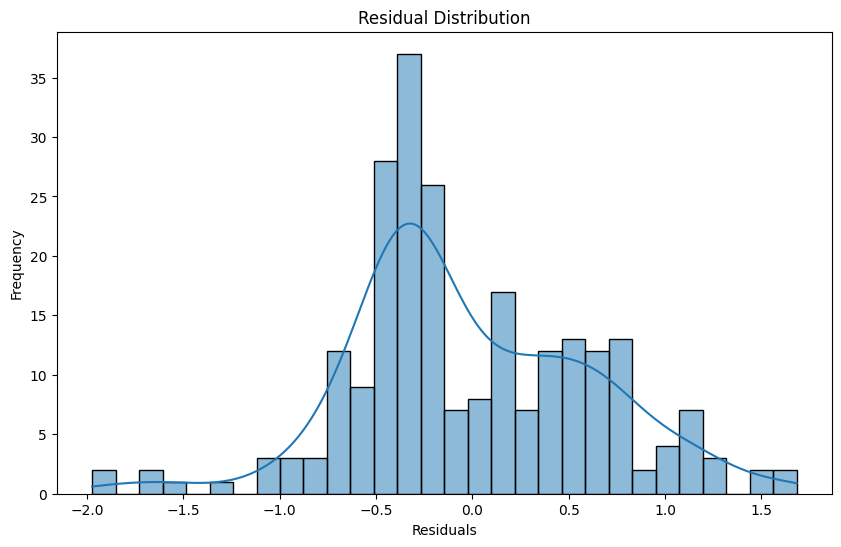

In [954]:
plt.figure(figsize=(10, 6))
residuals = y_test - predictions
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


The residual distribution model shows that the residuals are clustered around the -0.5 and -0.4 mark in the histogram.

## 3. Multiple Linear Regression

In [955]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [956]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [957]:
X2 = sm.add_constant(X_train) 
y = y_train

In [958]:
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     53.42
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           3.40e-91
Time:                        22:17:11   Log-Likelihood:                -795.14
No. Observations:                 943   AIC:                             1614.
Df Residuals:                     931   BIC:                             1672.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.7258 

The coefficient for fixed acidity is 0.0413. This means that for each 1-unit increase in fixed acidity, the predicted quality increases by 0.0413 units<br>

The top 3 most important variables and how they change with the target variable are Volatile acidity, Chloride, and alcohol. <br>

Volatile acidity and chlorides are negatively correlated with wine quality, meaning higher levels of these features predict lower quality.
Alcohol is positively correlated with wine quality, suggesting that wines with higher alcohol content are perceived as better quality.

#### MAE and RMSE

In [959]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

In [960]:
prediction_on_test = model2.predict(X_test)

In [961]:
print("prediction_on_test shape:", prediction_on_test.shape)

prediction_on_test shape: (236,)


In [962]:
MAE = mean_absolute_error(y_test, prediction_on_test)
RMSE = root_mean_squared_error(y_test, prediction_on_test)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.47411281932649973
RMSE: 0.6018115433918647


## 4. Regression Trees

In [963]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

#### Max depth 3 tree

In [964]:
model3 = DecisionTreeRegressor(random_state=0, max_depth=3)
model3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

[Text(0.5, 0.875, 'alcohol <= 10.35\nsquared_error = 0.516\nsamples = 943\nvalue = 5.619'),
 Text(0.25, 0.625, 'sulphates <= 0.575\nsquared_error = 0.355\nsamples = 545\nvalue = 5.347'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'residual sugar <= 1.3\nsquared_error = 0.273\nsamples = 239\nvalue = 5.155'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 7.0'),
 Text(0.1875, 0.125, 'squared_error = 0.26\nsamples = 238\nvalue = 5.147'),
 Text(0.375, 0.375, 'volatile acidity <= 0.535\nsquared_error = 0.368\nsamples = 306\nvalue = 5.497'),
 Text(0.3125, 0.125, 'squared_error = 0.385\nsamples = 147\nvalue = 5.667'),
 Text(0.4375, 0.125, 'squared_error = 0.3\nsamples = 159\nvalue = 5.34'),
 Text(0.75, 0.625, 'sulphates <= 0.705\nsquared_error = 0.495\nsamples = 398\nvalue = 5.992'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'pH <= 3.335\nsquared_error = 0.432\nsamples = 253\nvalue = 5.767'),
 Text(0.5625, 0.125, 'squared_error = 0.428\nsamples = 114\nvalue = 

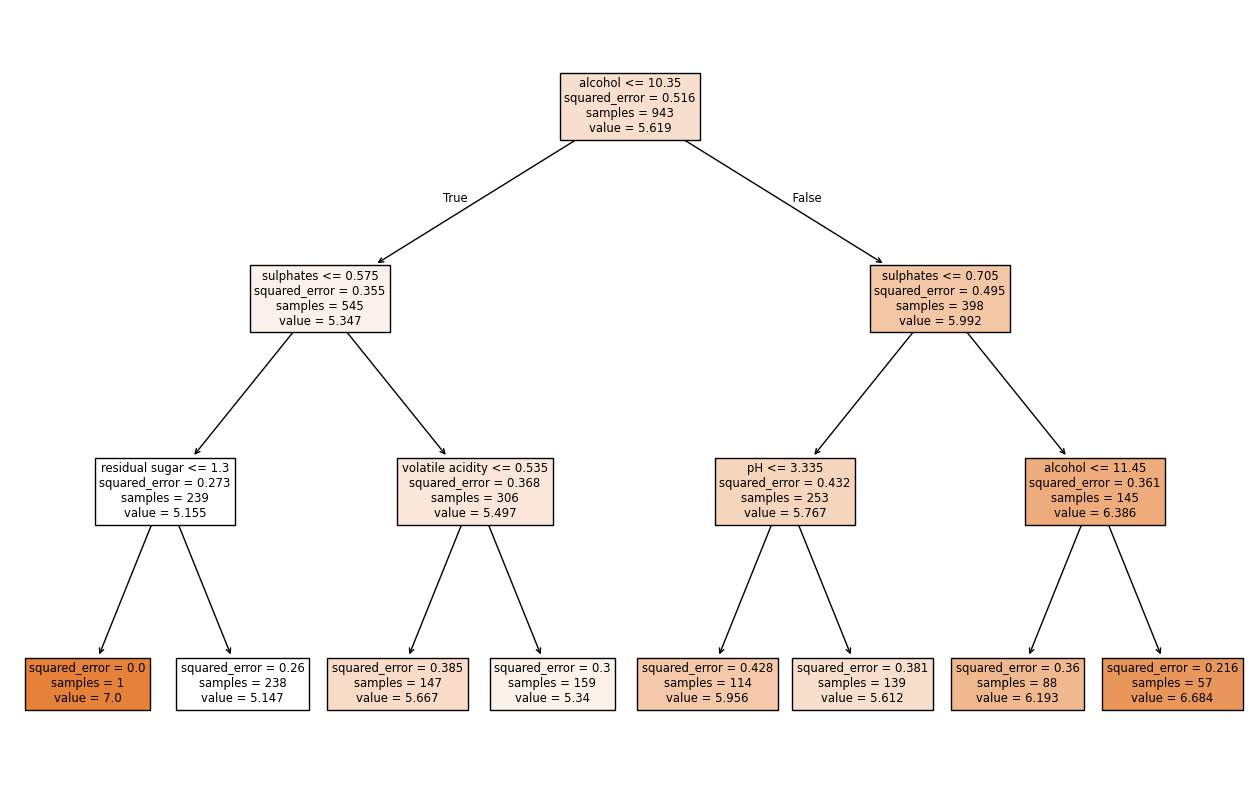

In [965]:
from sklearn import tree
fig = plt.figure(figsize=(16,10))
tree.plot_tree(model3,
               feature_names=list(X_train.columns),
               filled=True)

In [966]:
prediction_on_test1 = model3.predict(X_test)

In [967]:
MAE = mean_absolute_error(y_test, prediction_on_test1)
RMSE = root_mean_squared_error(y_test, prediction_on_test1)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.5023855150515215
RMSE: 0.6493037222961412


#### Max depth 5 tree

In [968]:
model4 = DecisionTreeRegressor(random_state=0, max_depth=5)
model4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

[Text(0.4419642857142857, 0.9166666666666666, 'alcohol <= 10.35\nsquared_error = 0.516\nsamples = 943\nvalue = 5.619'),
 Text(0.16964285714285715, 0.75, 'sulphates <= 0.575\nsquared_error = 0.355\nsamples = 545\nvalue = 5.347'),
 Text(0.3058035714285714, 0.8333333333333333, 'True  '),
 Text(0.05357142857142857, 0.5833333333333334, 'residual sugar <= 1.3\nsquared_error = 0.273\nsamples = 239\nvalue = 5.155'),
 Text(0.03571428571428571, 0.4166666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = 7.0'),
 Text(0.07142857142857142, 0.4166666666666667, 'sulphates <= 0.525\nsquared_error = 0.26\nsamples = 238\nvalue = 5.147'),
 Text(0.03571428571428571, 0.25, 'total sulfur dioxide <= 24.5\nsquared_error = 0.213\nsamples = 117\nvalue = 5.026'),
 Text(0.017857142857142856, 0.08333333333333333, 'squared_error = 0.199\nsamples = 35\nvalue = 4.829'),
 Text(0.05357142857142857, 0.08333333333333333, 'squared_error = 0.195\nsamples = 82\nvalue = 5.11'),
 Text(0.10714285714285714, 0.25, 'citric aci

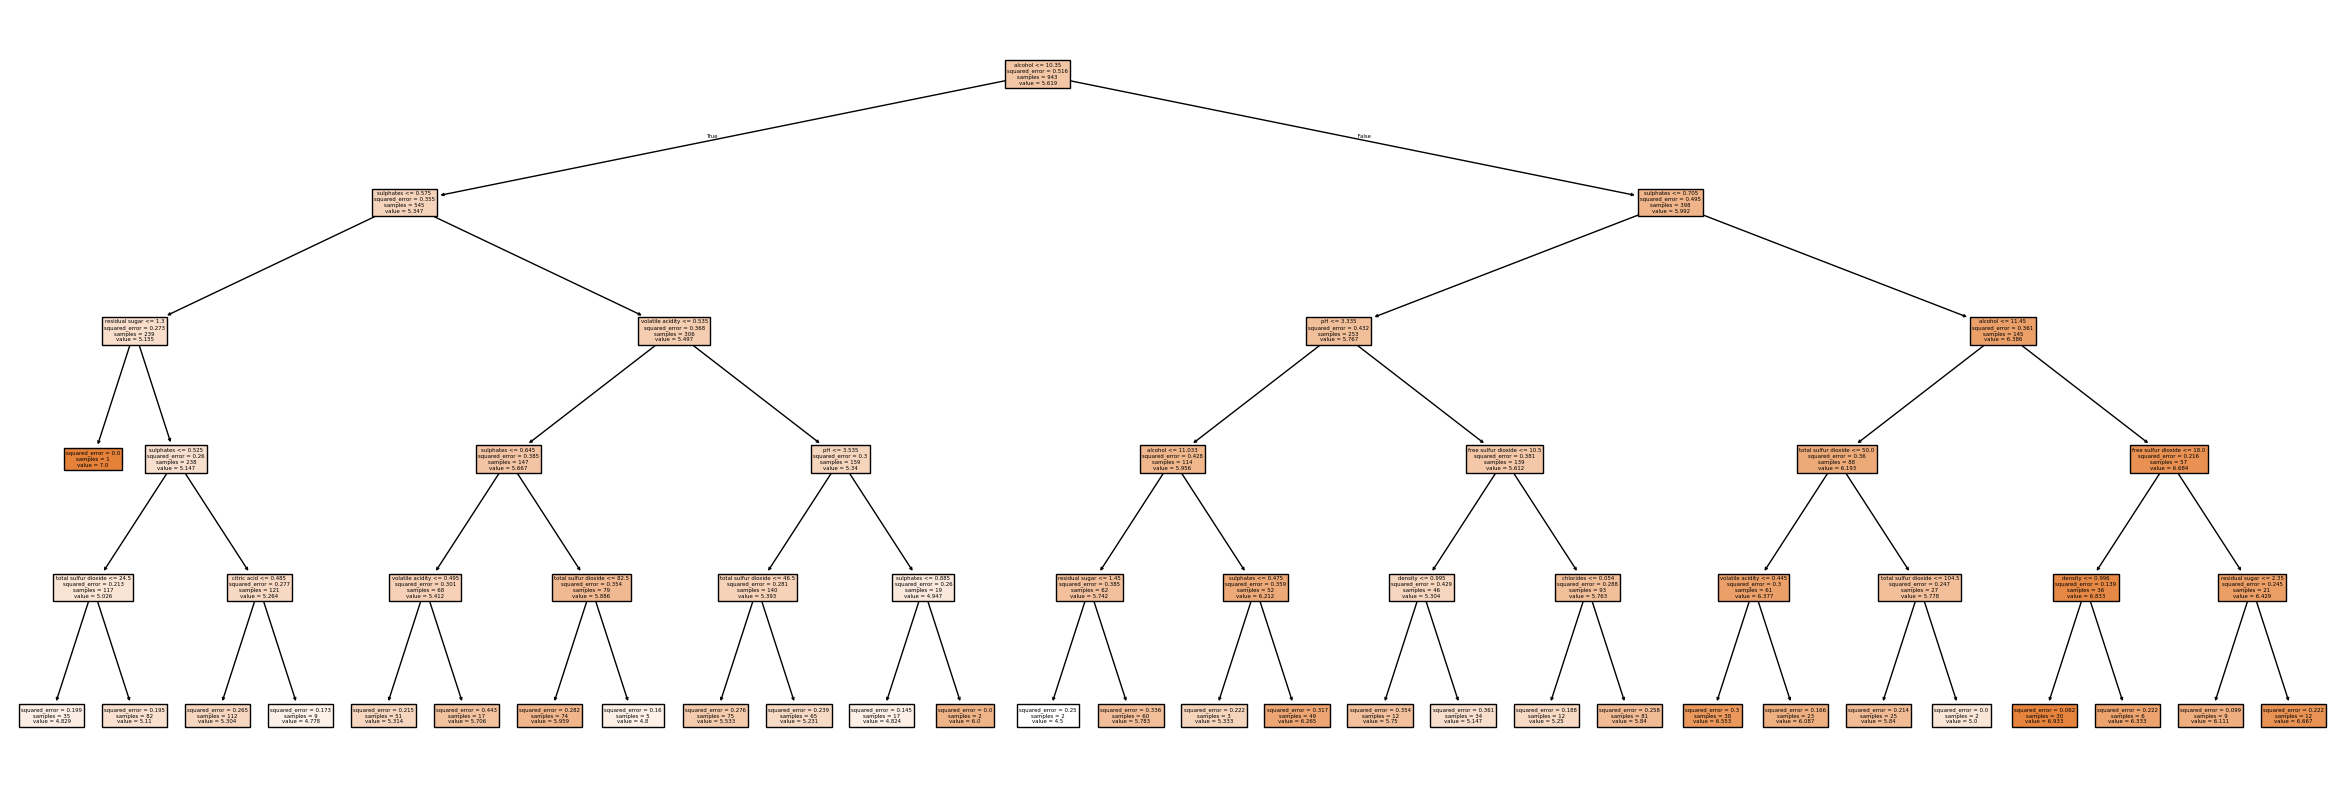

In [969]:
fig = plt.figure(figsize=(30,10))
tree.plot_tree(model4,
               feature_names=list(X_train.columns),
               filled=True)

In [970]:
prediction_on_test2 = model4.predict(X_test)

In [971]:
MAE = mean_absolute_error(y_test, prediction_on_test2)
RMSE = root_mean_squared_error(y_test, prediction_on_test2)

print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.49489700906513834
RMSE: 0.6413590636427778


Max depth 6 tree

In [972]:
model5 = DecisionTreeRegressor(random_state=0, max_depth=6)
model5.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

[Text(0.4519230769230769, 0.9285714285714286, 'alcohol <= 10.35\nsquared_error = 0.516\nsamples = 943\nvalue = 5.619'),
 Text(0.18629807692307693, 0.7857142857142857, 'sulphates <= 0.575\nsquared_error = 0.355\nsamples = 545\nvalue = 5.347'),
 Text(0.3191105769230769, 0.8571428571428572, 'True  '),
 Text(0.0673076923076923, 0.6428571428571429, 'residual sugar <= 1.3\nsquared_error = 0.273\nsamples = 239\nvalue = 5.155'),
 Text(0.057692307692307696, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 7.0'),
 Text(0.07692307692307693, 0.5, 'sulphates <= 0.525\nsquared_error = 0.26\nsamples = 238\nvalue = 5.147'),
 Text(0.038461538461538464, 0.35714285714285715, 'total sulfur dioxide <= 24.5\nsquared_error = 0.213\nsamples = 117\nvalue = 5.026'),
 Text(0.019230769230769232, 0.21428571428571427, 'total sulfur dioxide <= 22.5\nsquared_error = 0.199\nsamples = 35\nvalue = 4.829'),
 Text(0.009615384615384616, 0.07142857142857142, 'squared_error = 0.147\nsamples = 32\nvalue = 4.906'),
 Text(0.0288

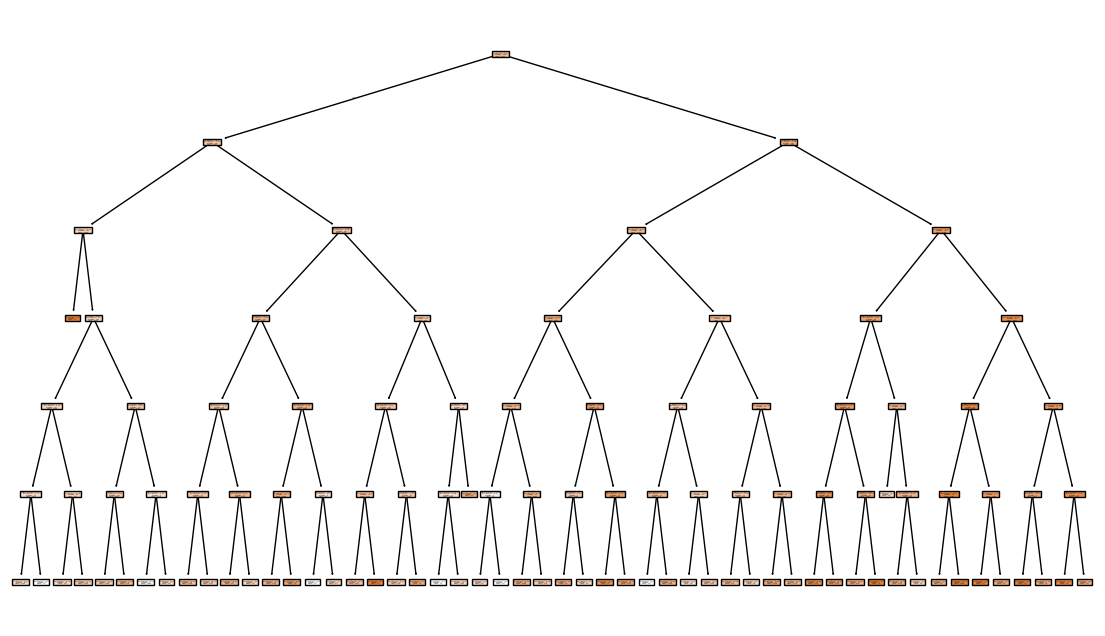

In [973]:
fig = plt.figure(figsize=(14,8))
tree.plot_tree(model5,
               feature_names=list(X_train.columns),
               filled=True)

In [974]:
prediction_on_test3 = model5.predict(X_test)

In [975]:
MAE = mean_absolute_error(y_test, prediction_on_test3)
RMSE = root_mean_squared_error(y_test, prediction_on_test3)

print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.5186946297570206
RMSE: 0.7205589837689252


The regression tree with a max depth of 5 is the best out of the 3 models.  It produces lower errors on average and has fewer large prediction errors compared to depth = 3 and depth = 7.

## 5. Support Vector Regression(SVR)

In [976]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [977]:
X = Wine.drop(['alcohol'], axis=1)  
y = Wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(825, 11) (354, 11) (825,) (354,)


Check to See which 'C' Value is the most optimal for this SVR model

In [978]:
#Define range of C values to test
param_grid = {'C': [0.1, 1, 10, 100,200, 250,325,350,375,425,450,475,500,600]}

grid_search = GridSearchCV(SVR(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

print("Optimal C:", grid_search.best_params_['C'])

Optimal C: 250


The optimal Value seems to be 250 out of all other given C values

#### Re-Test C Values

In [979]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [200,250, 300, 350,400, 500]}
grid_search = GridSearchCV(SVR(), param_grid, scoring={'mse': 'neg_mean_squared_error', 'mae': 'neg_mean_absolute_error'}, refit='mse', cv=5)
grid_search.fit(X_train, y_train)

cv_results = grid_search.cv_results_
mse_scores = -cv_results['mean_test_mse']
rmse_scores = np.sqrt(mse_scores)
mae_scores = -cv_results['mean_test_mae']

#Print results
print("MAE for each parameter set:", mae_scores)
print("RMSE for each parameter set:", rmse_scores)



MAE for each parameter set: [0.0369553  0.03578009 0.03594566 0.03601537 0.03609849 0.03607526]
RMSE for each parameter set: [0.04949841 0.04827131 0.04836823 0.04842689 0.04855283 0.04852675]


We can confirm that a C value of 250 is the most optimal choice as its MAE and RMSE Values are the lowest in the grouping.<br>
- C=250 has an RMSE of 0.0483 and an MAE of 0.0358.

## 6. Multiple Perceptron (MLP)

In [980]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning

X = Wine.drop(['alcohol'], axis=1)
y = Wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

MLP with 8 hidden nodes for the first layer, and 4 hidden nodes for the second layer


In [981]:
model_MLP1 = MLPRegressor(hidden_layer_sizes=(8,4), max_iter=500, random_state=1)
model_MLP1.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(8, 4), max_iter=500, random_state=1)

In [982]:
prediction_on_test = model_MLP1.predict(X_test)

In [983]:
MAE = mean_absolute_error(y_test, prediction_on_test)
RMSE = root_mean_squared_error(y_test, prediction_on_test)

print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.07693028856884705
RMSE: 0.09772718606693058


MLP with 16 hidden nodes for the first layer, and 8 hidden nodes for the second layer, and 4 hidden in the third

In [984]:
model_MLP2 = MLPRegressor(hidden_layer_sizes=(16,8,4),max_iter=700, random_state=1)
model_MLP2.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(16, 8, 4), max_iter=700, random_state=1)

In [985]:
prediction_on_test = model_MLP2.predict(X_test)

In [986]:
MAE = mean_absolute_error(y_test, prediction_on_test)
RMSE = mean_squared_error(y_test, prediction_on_test)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.21902624406930973
RMSE: 0.07964235440789383


MLP with 24 hidden nodes for the first layer, and 12 hidden nodes for the second layer, and 4 hidden in the third

In [987]:
model_MLP3 = MLPRegressor(hidden_layer_sizes=(24,12,8),max_iter=500, random_state=1)
model_MLP3.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(24, 12, 8), max_iter=500, random_state=1)

In [988]:
prediction_on_test = model_MLP3.predict(X_test)

In [989]:
MAE = mean_absolute_error(y_test, prediction_on_test)
RMSE = mean_squared_error(y_test, prediction_on_test)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.09194606213631296
RMSE: 0.013607857687899573


Thr third model best showcases the potential of the model's performance as the MAE score was a 0.1338. This means that on average this model's predictions are off by 0.1338 units. The RMSE, which represents the magnitude of error has a score of 0.1800.

## 7. Model Comparison

In [990]:
models = ['Simple Linear Regression(SLR)', 'Multiple Linear Regression', 'Regression Tree(Max depth=5)', 'SVR (C=250)', 'MLP(24,12,8)']
mae_values = [0.5055, 0.4741, 0.4949, 0.0358, 0.0919]
rmse_values = [0.6227, 0.6018, 0.6414, 0.0483, 0.0136]

In [991]:
x = np.arange(len(models))
width = 0.35

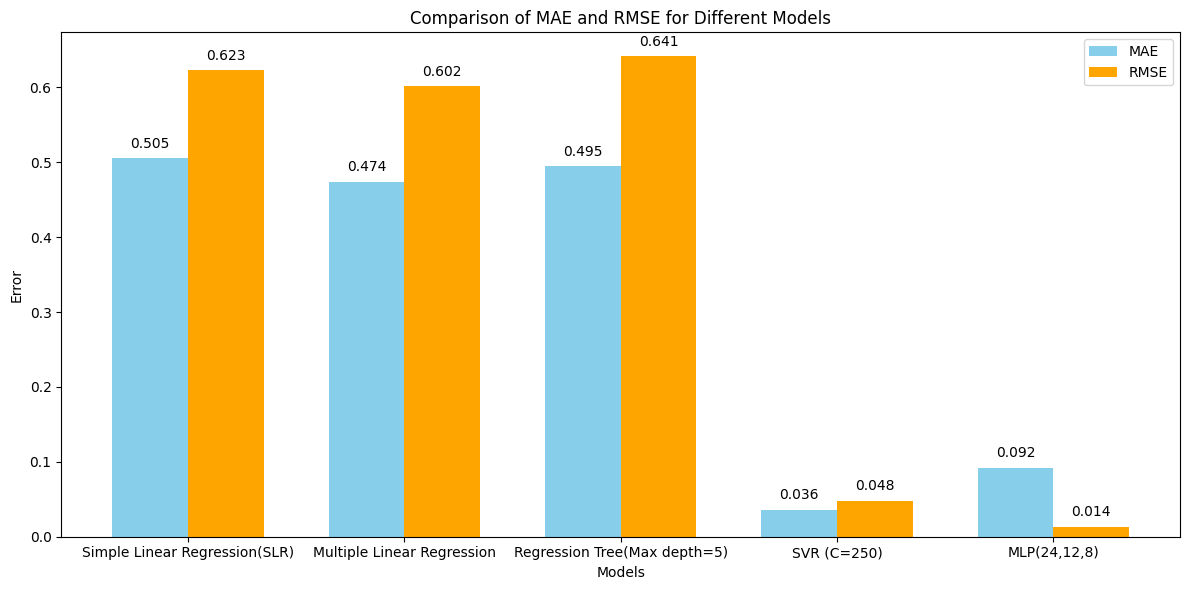

In [992]:
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, mae_values, width, label='MAE', color='skyblue')
bars2 = ax.bar(x + width/2, rmse_values, width, label='RMSE', color='orange')

ax.set_xlabel('Models')
ax.set_ylabel('Error')
ax.set_title('Comparison of MAE and RMSE for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

The SVR model should be used to predict wine quality because it has relatively the lowest MAE and RMSE which makes it more accurate in predicting wine quality using alcohol as the predicting variable.

## Findings and Conclusion

Among all the models tested, SVR with a C=350 emerged as the most accurate for predicting wine quality using alcohol as the predictor variable. This model achieved the lowest MAE (0.036) and a relatively low RMSE (0.048), indicating that it made predictions closest to the actual values with fewer errors compared to the other models. The low values for MAE and RMSE suggest that SVR(C=350) was well-tuned to the wine quality dataset, handling the complexity of the relationships between features better than other models. This combination of low error metrics and the model's ability to capture non-linear patterns makes SVR the most suitable choice for predicting wine quality in this case.

From a business data science perspective, this project demonstrates critical skills in predictive analytics, a key tool for informed decision-making. By identifying the most accurate model, it highlights the ability to optimize processes such as quality assurance and resource allocation. The project emphasizes the importance of understanding data relationships and tailoring models to meet specific business needs, which are essential for tasks like forecasting demand, pricing strategies, and customer segmentation. Additionally, the focus on evaluation metrics reflects a data-driven approach to assessing model performance, aligning with the goals of minimizing errors and maximizing efficiency in business contexts.